In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data= pd.read_csv(r'C:\Users\HP\Desktop\1.03. Dummies.csv')
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [30]:
raw = data.copy()

In [31]:
raw['Attendance']= raw['Attendance'].map({'Yes':1,'No':0})
raw

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [33]:
raw.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [34]:
y= raw['GPA']
x1=raw[['SAT','Attendance']]

In [36]:
x= sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.19e-15
Time:                        00:55:17   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

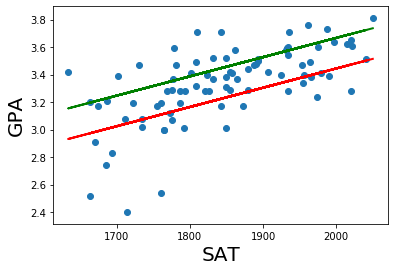

In [39]:
plt.scatter(raw['SAT'],y)
yhat_no=0.6439+0.0014*raw['SAT']
yhat_yes=0.8665+0.0014*raw['SAT']
fig = plt.plot(raw['SAT'],yhat_no,lw=2,c='red')
fig = plt.plot(raw['SAT'],yhat_yes,lw=2,c='green')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

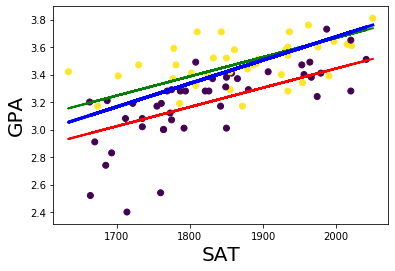

In [42]:
plt.scatter(raw['SAT'],raw['GPA'],c=raw['Attendance'])
yhat_no=0.6439+0.0014*raw['SAT']
yhat_yes=0.8665+0.0014*raw['SAT']
yhat=0.0017*raw['SAT']+0.275
fig = plt.plot(raw['SAT'],yhat_no,lw=2,c='red',label='regression line1')
fig = plt.plot(raw['SAT'],yhat_yes,lw=2,c='green',label='regression line2')
fig = plt.plot(raw['SAT'],yhat,lw=3,c='blue',label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()